In [1]:
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

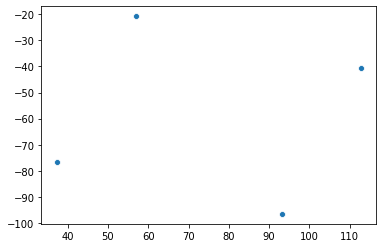

In [3]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full')

In [4]:
labelfile = './CowenKeltnerEmotionalVideos.csv'
labeldf = pd.read_csv(labelfile)

In [5]:
emocols= labeldf.columns[list(range(0,34))]
affectdimcols= labeldf.columns[list(range(34,48))]
freewordcols=labeldf.columns[list(range(48,648))]

In [6]:
sampletest = labeldf.head(99).iloc[89:][emocols]
sampletestindexed = sampletest.set_index('Filename')

In [7]:
#X = sampletestindexed.values
X = labeldf[emocols].set_index('Filename').values

In [8]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

In [9]:
X_embedded.shape

(2185, 2)

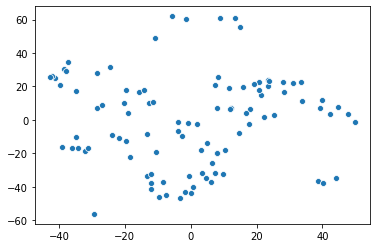

In [10]:
sns.scatterplot(X_embedded[:100,0], X_embedded[:100,1], legend='full')

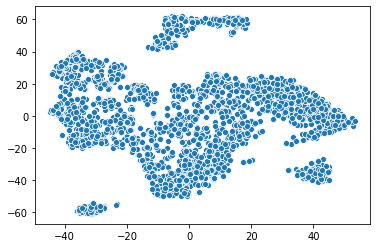

In [11]:
sns.scatterplot(X_embedded[:-1,0], X_embedded[:-1,1], legend='full')

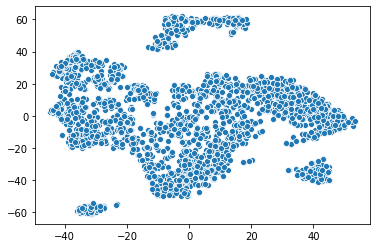

In [14]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

/home/yt/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yt/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yt/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yt/anaconda3/envs/tf_gpu/lib/python3.6/site-packages

In [14]:
LOG_DIR = os.getcwd()+'/cowen_log'
path_for_mnist_checkpoint = os.path.join(LOG_DIR, "model.ckpt")
path_for_mnist_metadata =  os.path.join(LOG_DIR,'metadata.tsv')
path_for_mnist_sprites =  os.path.join(LOG_DIR,'cowenmovies.png')
tensor_name = 'cowen_embeddings'

summary_writer = tf.summary.FileWriter(LOG_DIR)
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = tensor_name
embedding.metadata_path = path_for_mnist_metadata 
embedding.sprite.image_path = path_for_mnist_sprites
embedding.sprite.single_image_dim.extend([28,28])
projector.visualize_embeddings(summary_writer, config)